In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df = pd.read_csv('cleaned_and_binned_data.csv')
df

,status,order_date,Stock Keeping Unit,qty_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,BI Status,Monthly Volume,Year,Month,Customer Since,Customer ID,price
0,4,0,54360,0,9316,2,14,6261,2,6,0,839,0,6,3,0,1
1,1,0,54167,0,758,3,1,6261,2,6,1,3153,0,6,3,1,0
2,1,0,13347,0,11196,4,14,6261,2,6,1,2448,0,6,3,2,1
3,4,0,54222,0,201,5,1,5104,15120,6,2,4483,0,6,3,3,0
4,12,0,7766,1,5222,6,12,6261,2,6,3,106,0,6,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447317,1,783,6862,0,12036,312131,1,246,2,2,1,5436,2,7,25,87138,0
447318,1,783,5864,0,12036,312131,1,246,2,2,1,3039,2,7,25,87138,0
447319,1,783,14104,1,12036,312131,13,246,2,2,1,6129,2,7,25,87138,0
447320,3,783,25194,0,24921,312132,9,3704,2,6,3,2936,2,7,22,86164,3


In [3]:
df = df[:20000]

In [4]:
X = df.drop('price', axis=1)
y = df['price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

Decision Tree

[[1584    6    2    1]
 [   5  168    0    1]
 [   3    3  148    2]
 [   0    0    0   77]]


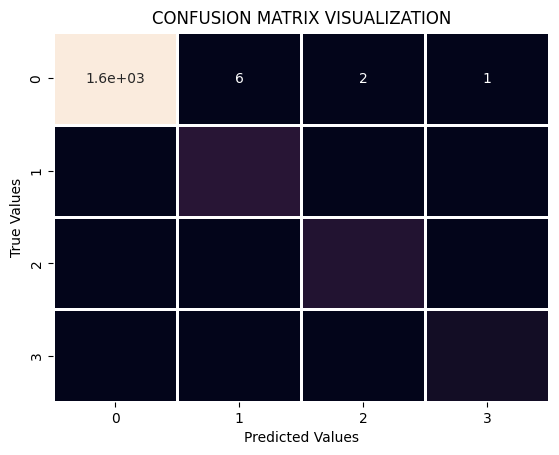

In [6]:
model1 = DecisionTreeClassifier()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)


conf = confusion_matrix(y_test,y_pred)
print(conf)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.savefig('confusionMatrix.png')
plt.show()

In [7]:
# Assuming you already have a classification report stored in the 'res' variable
res = classification_report(y_test, y_pred)

# Specify the file path where you want to save the classification report
output_file = 'classification_report.txt'

# Write the classification report to the file
with open(output_file, 'w') as f:
    f.write(res)

print(f"Classification report saved to {output_file}")
print(res)

Classification report saved to classification_report.txt
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1593
           1       0.95      0.97      0.96       174
           2       0.99      0.95      0.97       156
           3       0.95      1.00      0.97        77

    accuracy                           0.99      2000
   macro avg       0.97      0.98      0.97      2000
weighted avg       0.99      0.99      0.99      2000



Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Create and fit the Logistic Regression model
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)

# Make predictions
y_pred = logistic_reg.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.85
Precision: 0.83
Recall: 0.85
F1 Score: 0.84
Confusion Matrix:
[[1530   32   26    5]
 [ 108   40   20    6]
 [  23   10   98   25]
 [   0    1   46   30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1593
           1       0.48      0.23      0.31       174
           2       0.52      0.63      0.57       156
           3       0.45      0.39      0.42        77

    accuracy                           0.85      2000
   macro avg       0.59      0.55      0.56      2000
weighted avg       0.83      0.85      0.84      2000



C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Let's try multiple models in a loop

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.neural_network import MLPClassifier

In [15]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    # SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    # XGBClassifier(),
    # LGBMClassifier(),
    MLPClassifier()
]

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Iterate through models and evaluate their performance
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass
    f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Print or store the evaluation metrics for each model
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("\n")


C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.85
Precision: 0.83
Recall: 0.85
F1 Score: 0.84
Confusion Matrix:
[[1530   32   26    5]
 [ 108   40   20    6]
 [  23   10   98   25]
 [   0    1   46   30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1593
           1       0.48      0.23      0.31       174
           2       0.52      0.63      0.57       156
           3       0.45      0.39      0.42        77

    accuracy                           0.85      2000
   macro avg       0.59      0.55      0.56      2000
weighted avg       0.83      0.85      0.84      2000



Model: DecisionTreeClassifier
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Confusion Matrix:
[[1582    7    2    2]
 [   6  167    0    1]
 [   2    2  150    2]
 [   0    0    0   77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1593
           1

C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tafre\AppData\Roaming\Pyth

Model: MLPClassifier
Accuracy: 0.78
Precision: 0.89
Recall: 0.78
F1 Score: 0.81
Confusion Matrix:
[[1231  303   34   13   12]
 [  12  150    7    5    0]
 [   3   30  112   11    0]
 [   0    2   17   58    0]
 [   0    0    0    0    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      1593
           1       0.31      0.86      0.46       174
           2       0.66      0.72      0.69       156
           3       0.67      0.75      0.71        77
           4       0.00      0.00      0.00         0

    accuracy                           0.78      2000
   macro avg       0.52      0.62      0.54      2000
weighted avg       0.89      0.78      0.81      2000





C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tafre\AppData\Roaming\Pyth

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
import warnings

# Filter out LightGBM warnings
warnings.filterwarnings("ignore")

C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [9]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [16]:
# Add these models to the list of models
models.extend([
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RidgeClassifier(),
    SGDClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    HistGradientBoostingClassifier(),
    # GaussianProcessClassifier(),
    MLPClassifier(max_iter=1000),
    VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier()),
        ('lgbm', LGBMClassifier())
    ]),
    StackingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier()),
        ('lgbm', LGBMClassifier())
    ], final_estimator=LogisticRegression())
])



In [16]:

with open("warnings.log", "w"):
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=FutureWarning)



In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Iterate through models and evaluate their performance
for model in models:
    model_name = model.__class__.__name__

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass
    f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print or store the evaluation metrics for each model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")


Model: LogisticRegression
Accuracy: 0.84
Precision: 0.82
Recall: 0.84
F1 Score: 0.82
Confusion Matrix:
[[1498   31   21    8    0]
 [ 135   50   15    5    0]
 [  32    3   94   18    0]
 [   0    1   52   33    0]
 [   4    0    0    0    0]]


Model: DecisionTreeClassifier
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Confusion Matrix:
[[1549    5    2    2    0]
 [   5  199    0    1    0]
 [   4    0  142    1    0]
 [   1    0    3   82    0]
 [   0    0    0    0    4]]


Model: RandomForestClassifier
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Confusion Matrix:
[[1550    6    2    0    0]
 [   8  196    0    1    0]
 [   3    0  142    2    0]
 [   0    1    1   84    0]
 [   0    0    0    0    4]]


Model: KNeighborsClassifier
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Confusion Matrix:
[[1509   37    8    4    0]
 [  50  146    6    3    0]
 [   5    5  127   10    0]
 [   1    3    3   79    0]
 [   2    0    0    0    2]]


Model:

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1704, number of negative: 16296
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1704
[LightGBM] [Info] Number of data points in the train set: 18000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094667 -> initscore=-2.257941
[LightGBM] [Info] Start training from score -2.257941
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1704, number of negative: 16296
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1704
[LightGBM] [Info] Number of data points in the train set: 18000, number of used f

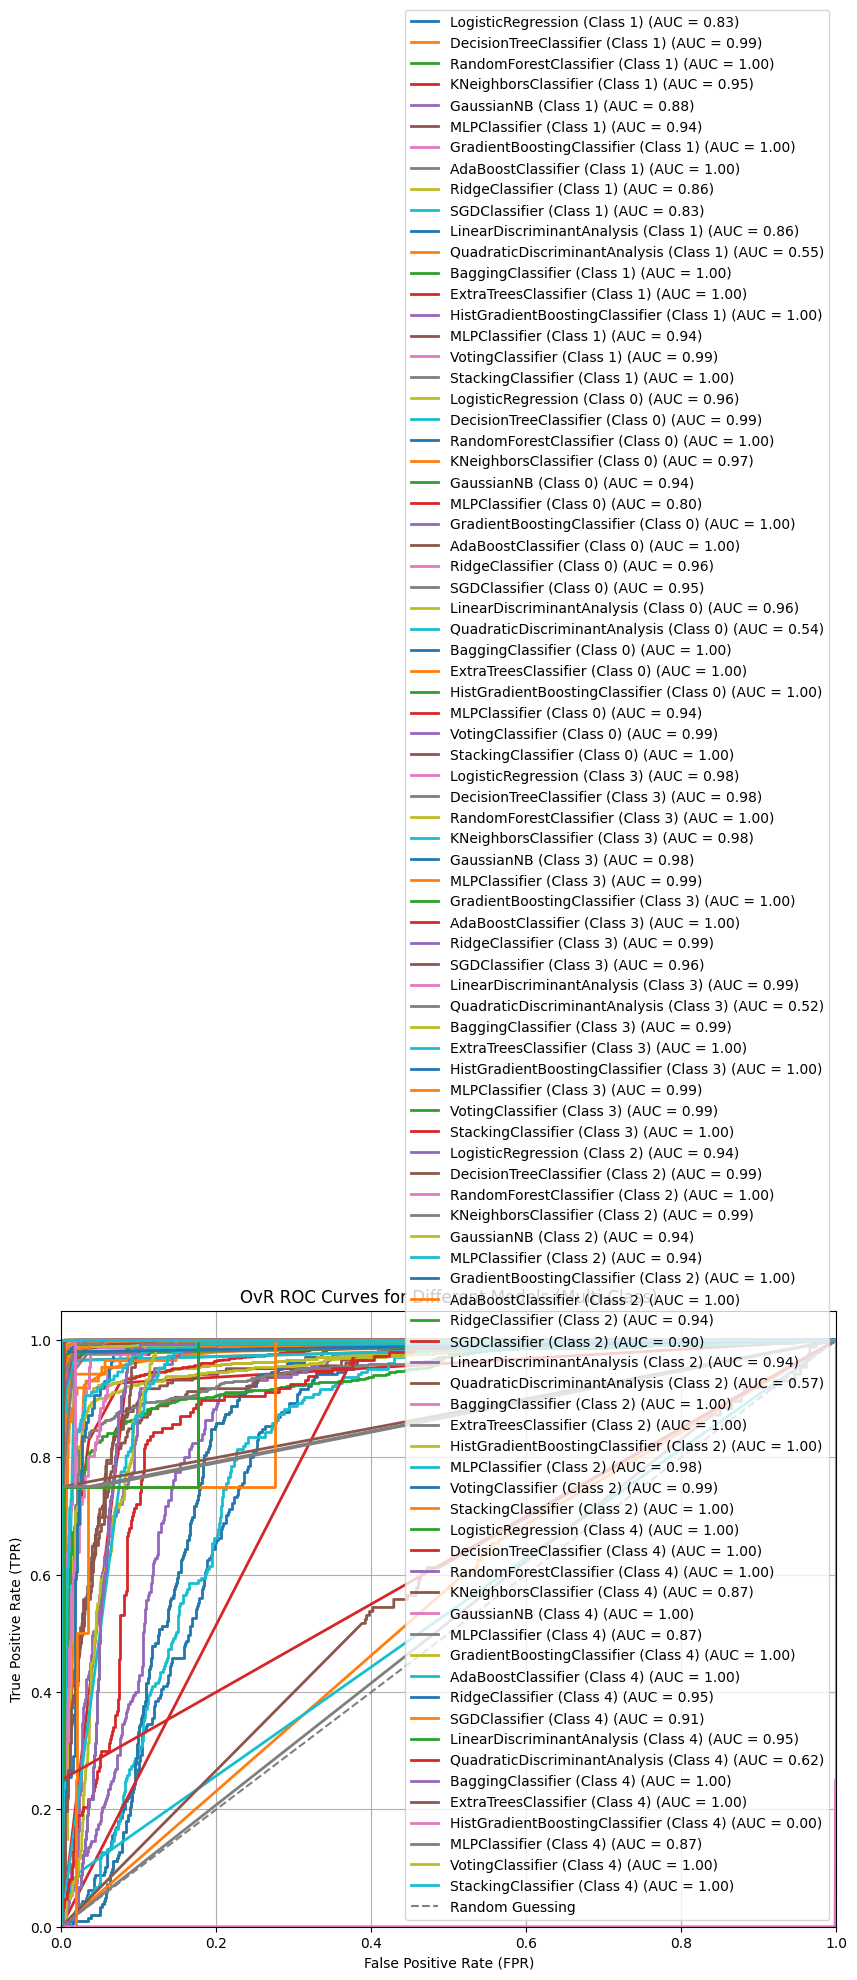

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

roc_data = {}

# Create a figure for separate ROC curves
plt.figure(figsize=(10, 8))

for class_label in df['price'].unique():
    class_name = f'Class {class_label}'
    
    # Create binary labels: 1 for the current class, 0 for others
    y_train_binary = (y_train == class_label).astype(int)
    y_test_binary = (y_test == class_label).astype(int)
    
    for model in models:
        model_name = model.__class__.__name__
        
        # Fit the model
        model.fit(X_train, y_train_binary)
        
        # Check if the model supports predict_proba
        if hasattr(model, "predict_proba"):
            # Get predicted probabilities for positive class
            y_pred_prob = model.predict_proba(X_test)[:, 1]
        else:
            # For models without predict_proba, use decision_function or predict directly
            if hasattr(model, "decision_function"):
                y_pred_prob = model.decision_function(X_test)
            else:
                y_pred_prob = model.predict(X_test)
        
        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        
        # Store ROC curve data
        if model_name not in roc_data:
            roc_data[model_name] = {}
        roc_data[model_name][class_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
        
        # Plot ROC curve with labels
        label = f'{model_name} (AUC = {roc_auc:.2f})'
        plt.plot(fpr, tpr, lw=2, label=label)

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('OvR ROC Curves for Different Models (Multi-Class)')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()
